In [1]:
from ipynb.fs.full.Models import *
download=False

# 0. Tables

In [2]:
fname = 'init_params.csv'
df = pd.read_csv(fname, sep=';')
df.index = df.Model
a_ws = np.array(df.loc[times[0]].a)
r_ws = np.array(df.loc[times[0]].r)
weights = [(float(a_ws[i]),float(r_ws[i])) for i in range(len(a_ws))]

In [3]:
fname='params/SIR_models.csv'
df = pd.read_csv(fname, index_col=0)
df = df[df.country=='Italy']
df=df.drop(columns='country')
df

,oldAIC,AIC,cost,time,a,r,beta,mu,I0,alpha,t_lock,beta_lock
0,-777.143201,-2390.781338,0.001149,exp,0.0,1.0,1.318439,1.177445e-09,2.677400e-12,5.980457e-02,NaN,NaN
1,-760.865589,-2389.773635,0.001323,rational,0.0,1.0,1.501247,7.032931e-02,6.806025e-14,6.987136e-02,NaN,NaN
2,-1680.891505,-2389.194279,0.000689,exp,1.0,1.0,1.325382,4.043834e-11,2.464128e-12,5.987817e-02,NaN,NaN
3,-752.315484,-2354.797206,0.001399,fermi,0.0,1.0,0.760774,2.545042e-13,2.406305e-10,6.154511e-02,3.694689e-10,NaN
4,-1638.421726,-2352.367257,0.000821,fermi,1.0,1.0,0.766751,2.029243e-13,2.182333e-10,6.166013e-02,3.294176e-09,NaN
5,-1587.806122,-2350.285826,0.001030,rational,1.0,1.0,0.837801,7.662145e-02,9.262495e-11,4.905447e-02,NaN,NaN
6,-1514.241853,-2305.790664,0.001402,fermi,1.0,0.0,0.771313,2.542361e-12,1.748827e-10,6.120656e-02,1.972973e-09,NaN
7,-776.712640,-2297.856413,0.001134,fermi,0.0,0.0,0.759832,5.760759e-12,2.055061e-10,6.090803e-02,4.240185e-11,NaN
12,-1539.268341,-2263.001136,0.001269,exp,1.0,0.0,1.211150,5.631315e-04,7.881878e-12,5.794745e-02,NaN,NaN
17,-770.476995,-2244.071173,0.001217,exp,0.0,0.0,1.156116,3.725007e-03,1.305620e-11,5.626158e-02,NaN,NaN


In [4]:
fname='original_params/SIR_models.csv'
df = pd.read_csv(fname, index_col=0)
df = df[df.country=='Italy']
df = df.drop(columns='country')
df = df.drop(columns='a')
df = df.drop(columns='r')
df

,AIC,cost,time,beta,mu,I0,alpha,t_lock,beta_lock
0,-2392.126384,1.015397e-09,fermi,0.527973,0.000157,2.029608e-09,0.060694,4.984973,NaN
1,-2338.702259,1.637342e-09,exp,0.817433,0.009883,1.047817e-09,0.050126,NaN,NaN
3,-2310.735416,2.083746e-09,rational,0.434733,0.094269,5.606929e-08,0.030079,NaN,NaN
19,-1875.884338,8.697687e-08,lock,0.293131,0.081355,5.860644e-07,NaN,34.000000,0.078105


plot requires loaded models. Model(country, time)

In [5]:
# Load Models

models = []
for i,country in enumerate(countries):
    mods=[]
    for time in times:
        mod=Model(country, SIR, time=time, start=starts[i],download=download)
        #mod=country+' '+time #just test line
        mods.append(mod)
    mods=dict(zip(times,mods))
    models.append(mods)
models=dict(zip(countries,models))

Creating SIR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIR for Germany
Loaded country's population
Loaded time series of 111 days
Lockdown at 2020-03-20 -> at day 58
VA-lockdown index: 41
Creating SIR for Germany
Loaded country's population
Loaded time series of 111 days
Lockdown at 2020-03-20 -> at day 58
VA-lockdown index: 41
Creating SIR for Germany
Loaded country's population
Loaded time series of 111 days
Lockdown at 2020-03-20 -> at day 58
VA-lockdown index: 41
Creating SIR f

In [6]:
country = 'Italy'
i=c_index[country]

# 1. Fixed weights
Plot: v_a + beta + original data<br>
number of plots: times = 4

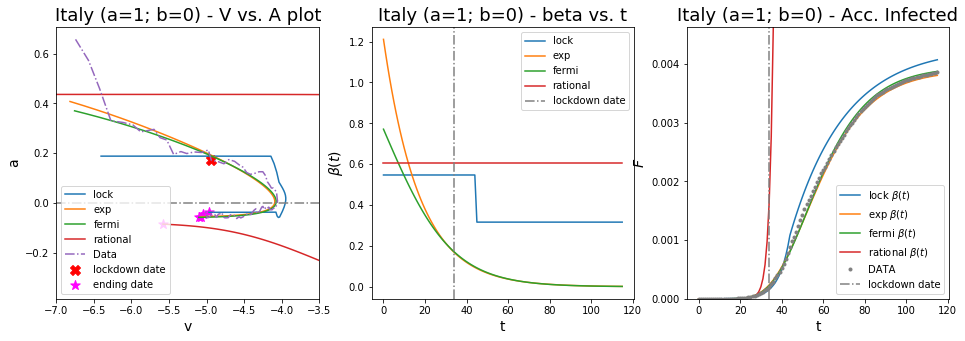

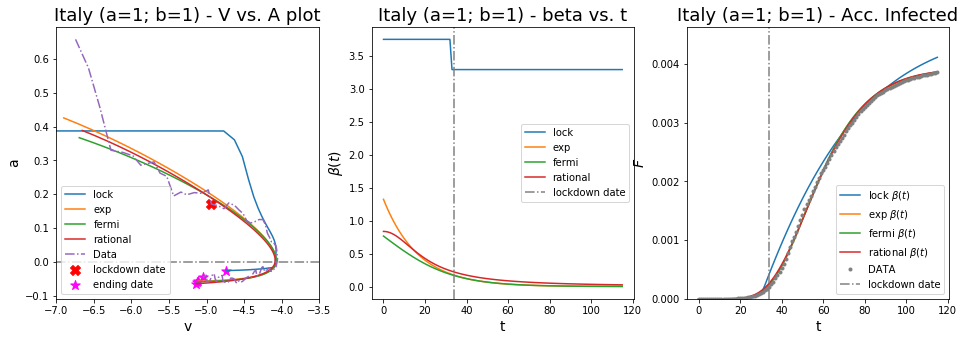

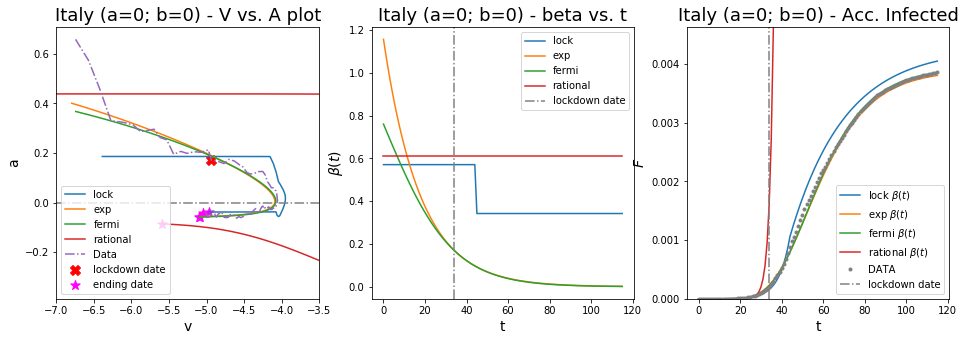

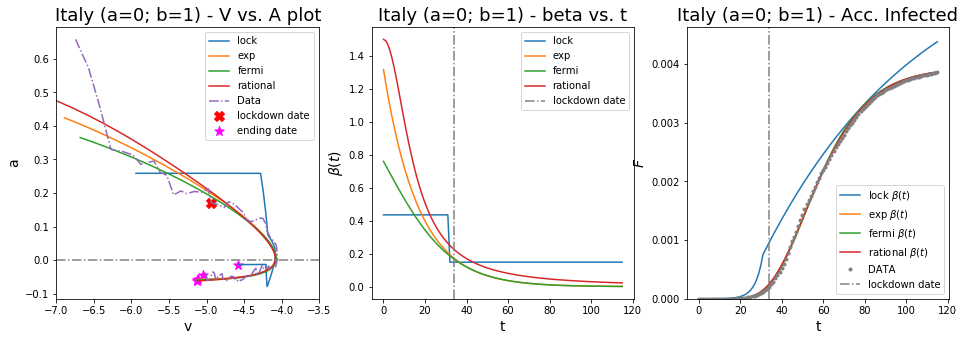

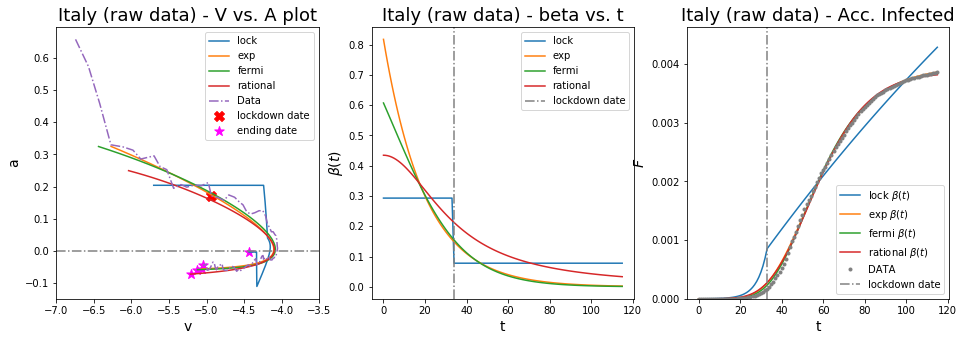

In [7]:
# DIFFERENT WEIGHTS
for a_w, r_w in weights:

    fig, (ax, ax2, ax3) = plt.subplots(1,3,figsize=(16,5))

    for time in times:
        #load models and params
        mod=models[country][time]
        fname=time+'_'+str(a_w)+'_'+str(r_w)+'.csv'
        df = pd.read_csv('params/'+fname, index_col=0)
        opt_params=list(df.loc[country][:-2])

        ##in-loop plots
        #va
        v, a = mod.predict(opt_params)
        ax.plot(v, a, label=time)
        ax.scatter(v[-1], a[-1], c='magenta',marker='*',s=100,zorder=2)

        #beta
        t = np.arange(0, mod.T)
        beta = mod.predict(opt_params, out='Beta')
        ax2.plot(t, beta, label=time)

        #time series
        F = mod.predict(opt_params,out='F')
        plt.plot(t, F, label = time + r' $\beta(t)$')

    ##after loop plots
    intitle = ' (a='+str(int(a_w))+'; b='+str(int(r_w))+')'
    #va
    ax.plot(mod.v_data, mod.a_data, '-.', label='Data')
    ax.scatter(mod.v_data[mod.lock_index-L-z-1], mod.a_data[mod.lock_index-L-z-1], 
                    c='red',marker='X',s=100, label='lockdown date')
    ax.scatter(mod.v_data[-1], mod.a_data[-1], 
                    c='magenta',marker='*',s=100,zorder=2, label='ending date')

    ax.set_xlim([-7., -3.5]) #not useful for fixed country
    ax.axhline(y=0, color='gray', linestyle='-.')
    ax.legend()
    ax.set_xlabel('v', size=14)
    ax.set_ylabel('a', size=14)
    ax.set_title(countries[i]+intitle+' - V vs. A plot', size=18)

    #beta
    ax2.axvline(x=mod.lock_index, color='grey', linestyle='-.', label='lockdown date')
    ax2.legend()
    ax2.set_xlabel('t', size=14)
    ax2.set_ylabel(r'$\beta(t)$', size=14)
    ax2.set_title(countries[i]+intitle+' - beta vs. t', size=18)

    #time series
    ax3.set_ylim([0,mod.data[-1]/mod.N*1.2])
    ax3.plot(t, mod.data/mod.N, '.', color='gray',label='DATA')
    ax3.axvline(x=mod.lock_index, color='grey', linestyle='-.', label='lockdown date')
    ax3.legend()
    ax3.set_xlabel('t', size=14)
    ax3.set_ylabel(r'$F$', size=14)
    ax3.set_title(countries[i]+intitle+' - Acc. Infected', size=18)
    plt.show()
    
    
# RAW DATA
fig, (ax, ax2, ax3) = plt.subplots(1,3,figsize=(16,5))

for time in times:
    #load models and params
    mod=models[country][time]
    fname=time+'.csv'
    df = pd.read_csv('original_params/'+fname, index_col=0)
    opt_params=list(df.loc[country][:-2])

    ##in-loop plots
    #va
    v, a = mod.predict(opt_params)
    ax.plot(v, a, label=time)
    ax.scatter(v[-1], a[-1], c='magenta',marker='*',s=100,zorder=2)

    #beta
    t = np.arange(0, mod.T)
    beta = mod.predict(opt_params, out='Beta')
    ax2.plot(t, beta, label=time)

    #time series
    F = mod.predict(opt_params,out='F')
    plt.plot(t, F, label = time + r' $\beta(t)$')

##after loop plots
intitle = ' (raw data)'
#va
ax.plot(mod.v_data, mod.a_data, '-.', label='Data')
ax.scatter(mod.v_data[mod.lock_index-L-z-1], mod.a_data[mod.lock_index-L-z-1], 
                c='red',marker='X',s=100, label='lockdown date')
ax.scatter(mod.v_data[-1], mod.a_data[-1], 
                c='magenta',marker='*',s=100,zorder=2, label='ending date')

ax.set_xlim([-7., -3.5]) #not useful for fixed country
ax.axhline(y=0, color='gray', linestyle='-.')
ax.legend()
ax.set_xlabel('v', size=14)
ax.set_ylabel('a', size=14)
ax.set_title(countries[i]+intitle+' - V vs. A plot', size=18)

#beta
ax2.axvline(x=mod.lock_index, color='grey', linestyle='-.', label='lockdown date')
ax2.legend()
ax2.set_xlabel('t', size=14)
ax2.set_ylabel(r'$\beta(t)$', size=14)
ax2.set_title(countries[i]+intitle+' - beta vs. t', size=18)

#time series
ax3.set_ylim([0,mod.data[-1]/mod.N*1.2])
ax3.plot(t, mod.data/mod.N, '.', color='gray',label='DATA')
ax3.axvline(x=mod.lock_index-1, color='grey', linestyle='-.', label='lockdown date')
ax3.legend()
ax3.set_xlabel('t', size=14)
ax3.set_ylabel(r'$F$', size=14)
ax3.set_title(countries[i]+intitle+' - Acc. Infected', size=18)
plt.show()

# 2. different weights, fixed time

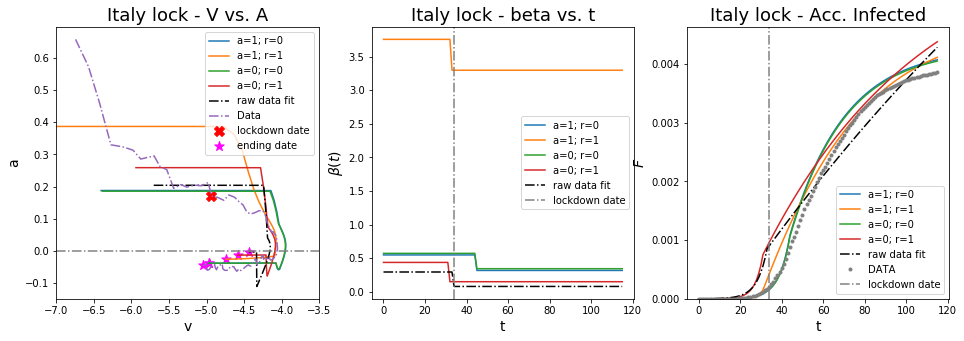

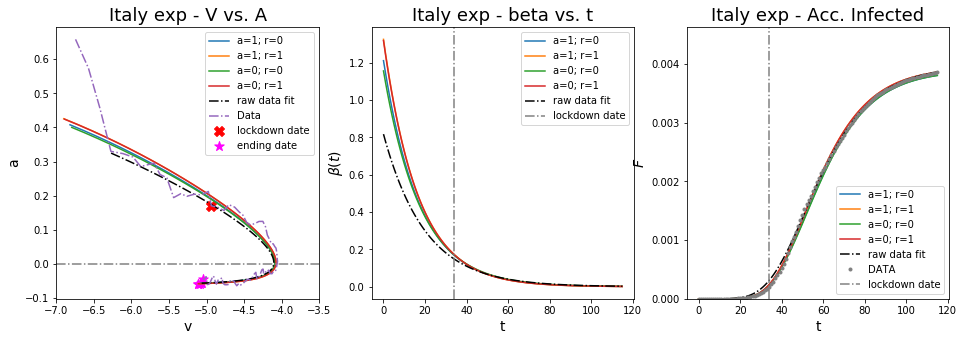

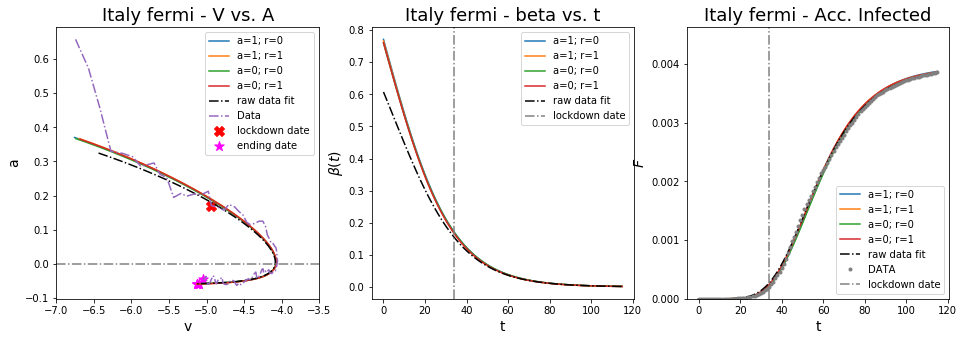

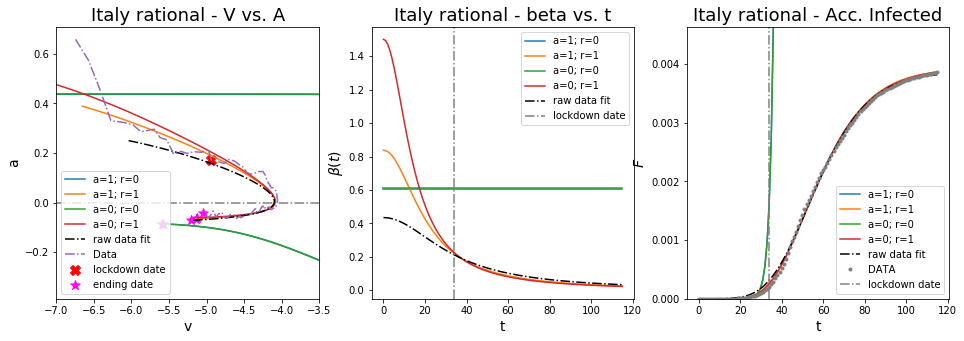

In [8]:
for time in times:
    fig, (ax, ax2, ax3) = plt.subplots(1,3,figsize=(16,5))

    # WEIGHTS FIT
    for a_w,r_w in weights:
        label='a=' +str(int(a_w))+'; r='+str(int(r_w))
        #load models and params
        mod=models[country][time]
        fname=time+'_'+str(a_w)+'_'+str(r_w)+'.csv'
        df = pd.read_csv('params/'+fname, index_col=0)
        opt_params=list(df.loc[country][:-2])

        ##in-loop plots
        #va
        v, a = mod.predict(opt_params)
        ax.plot(v, a, label=label)
        ax.scatter(v[-1], a[-1], c='magenta',marker='*',s=100,zorder=2)

        #beta
        t = np.arange(0, mod.T)
        beta = mod.predict(opt_params, out='Beta')
        ax2.plot(t, beta, label=label)

        #time series
        F = mod.predict(opt_params,out='F')
        plt.plot(t, F, label = label)
    
    # RAW DATA FIT
    mod=models[country][time]
    fname=time+'.csv'
    df = pd.read_csv('original_params/'+fname, index_col=0)
    opt_params=list(df.loc[country][:-2])

    ##in-loop plots
    label='raw data fit'
    #va
    v, a = mod.predict(opt_params)
    ax.plot(v, a, '-.', label=label, color='black')
    ax.scatter(v[-1], a[-1], c='magenta',marker='*',s=100,zorder=2)

    #beta
    t = np.arange(0, mod.T)
    beta = mod.predict(opt_params, out='Beta')
    ax2.plot(t, beta, '-.', label=label, color='black')

    #time series
    F = mod.predict(opt_params,out='F')
    plt.plot(t, F, '-.', label = label, color='black')

    ##after loop plots
    intitle=' '+time
    #va
    ax.plot(mod.v_data, mod.a_data, '-.', label='Data')
    ax.scatter(mod.v_data[mod.lock_index-L-z-1], mod.a_data[mod.lock_index-L-z-1], 
                    c='red',marker='X',s=100, label='lockdown date')
    ax.scatter(mod.v_data[-1], mod.a_data[-1], 
                    c='magenta',marker='*',s=100,zorder=2, label='ending date')

    ax.set_xlim([-7., -3.5]) #not useful for fixed country
    ax.axhline(y=0, color='gray', linestyle='-.')
    ax.legend()
    ax.set_xlabel('v', size=14)
    ax.set_ylabel('a', size=14)
    ax.set_title(countries[i]+intitle+' - V vs. A', size=18)

    #beta
    ax2.axvline(x=mod.lock_index, color='grey', linestyle='-.', label='lockdown date')
    ax2.legend()
    ax2.set_xlabel('t', size=14)
    ax2.set_ylabel(r'$\beta(t)$', size=14)
    ax2.set_title(countries[i]+intitle+' - beta vs. t', size=18)

    #time series
    ax3.set_ylim([0,mod.data[-1]/mod.N*1.2])
    ax3.plot(t, mod.data/mod.N, '.', color='gray',label='DATA')
    ax3.axvline(x=mod.lock_index, color='grey', linestyle='-.', label='lockdown date')
    ax3.legend()
    ax3.set_xlabel('t', size=14)
    ax3.set_ylabel(r'$F$', size=14)
    ax3.set_title(countries[i]+intitle+' - Acc. Infected', size=18)
    plt.show()

# 3. AIC comparison

In [9]:
fname='params/SIR_models.csv'
df = pd.read_csv(fname, index_col=0)
df = df[df.country=='Italy']
df=df.drop(columns='country')

In [10]:
fname='original_params/SIR_models.csv'
df_raw = pd.read_csv(fname, index_col=0)
df_raw = df_raw[df_raw.country=='Italy']
df_raw = df_raw.drop(columns='country')

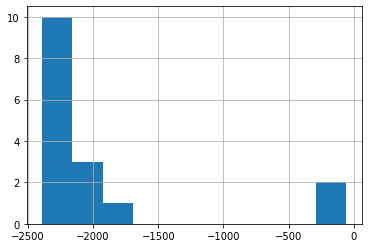

In [11]:
df.AIC.hist()
plt.show()

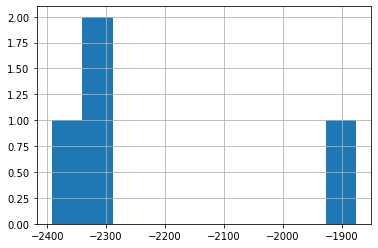

In [12]:
df_raw.AIC.hist()
plt.show()

In [13]:
fname='params/SIR_models.csv'
df = pd.read_csv(fname, index_col=0)
df = df[df.country=='Italy']
df=df.drop(columns='country')

fname='original_params/SIR_models.csv'
df_raw = pd.read_csv(fname, index_col=0)
df_raw = df_raw[df_raw.country=='Italy']
df_raw = df_raw.drop(columns='country')
#add column for old AIC
col = {'oldAIC':['NaN']*len(df_raw)}
col=pd.DataFrame(col)
col.index=df_raw.index
df_raw=pd.concat([col,df_raw],axis=1)

#rearange df in weights order:
df = df.sort_values('a',axis=0, ascending=False)
df1 = df[df.a==1.].sort_values('r')
df1.index = range(len(df1))
df2 = df[df.a==0.].sort_values('r')
df2.index = range(len(df1),2*len(df1))
df = pd.concat([df1,df2])
df_raw.index=range(2*len(df1),2*len(df1)+len(df_raw))
df = pd.concat([df, df_raw])
#discard unnecessary values
df = df.drop(columns='a')
df = df.drop(columns='r')

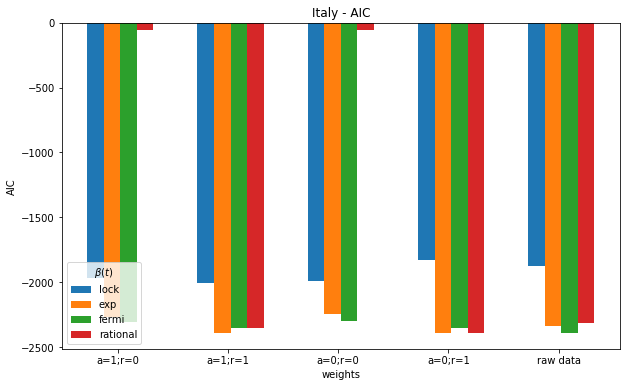

In [14]:
#barplot
plt.figure(figsize=(10,6))

width=0.15
x=np.array(np.arange(5)-3*width)

data=[]
for i,time in enumerate(times):
    data=df[df.time==time]
    plt.bar(x + i*width,list(data.AIC), width = width)

plt.legend(title=r'$\beta(t)$', labels=times)
x_lab = ['a='+str(int(weights[i][0]))+';r='+ str(int(weights[i][1])) for i in range(4)]
x_lab.append('raw data')
plt.xticks(x+0.2, labels=x_lab)
plt.title(country + ' - AIC')
plt.xlabel('weights')
plt.ylabel('AIC')
plt.show()

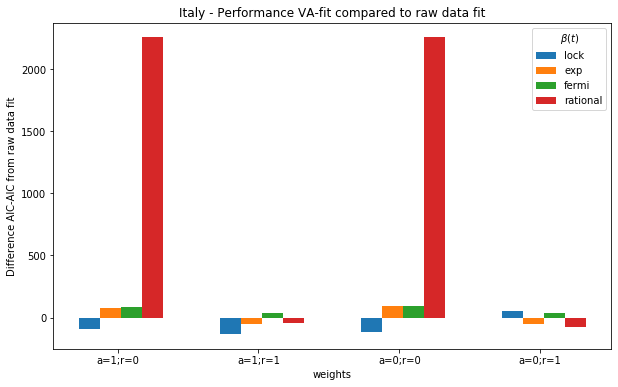

In [15]:
plt.figure(figsize=(10,6))

width=0.15
x=np.array(np.arange(4)-3*width)

rawdata=[]
data=[]
for i,time in enumerate(times):
    data=df[df.time==time]
    data=data[:-1].AIC.to_numpy()-data[-1:].AIC.to_numpy() #substract raw_data fit AIC from AICs of va-models
    plt.bar(x + i*width,data, width = width)

plt.legend(title=r'$\beta(t)$', labels=times)
x_lab = ['a='+str(int(weights[i][0]))+';r='+ str(int(weights[i][1])) for i in range(4)]
x_lab.append('raw data')
plt.xticks(x+0.2, labels=x_lab)
plt.title(country + ' - Performance VA-fit compared to raw data fit')
plt.xlabel('weights')
plt.ylabel('Difference AIC-AIC from raw data fit')
plt.show()

# 4.Parameters

In [16]:
#discard performance values
df=df[list(df.columns)[3:]]

In [17]:
params=np.array(df.columns[1:])
params

array(['beta', 'mu', 'I0', 'alpha', 't_lock', 'beta_lock'], dtype=object)

rough I0 estimation 7.565864634576305e-08


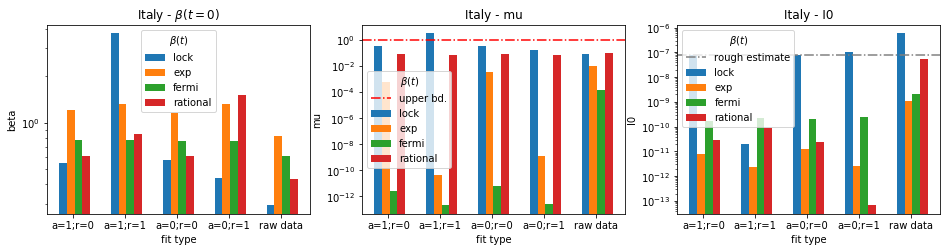

Exchanged label<->axis


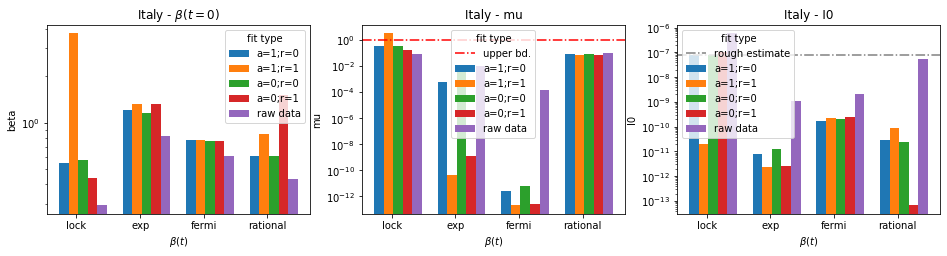

In [18]:
#SEIAR params, label: time, axis: fit type

#calculate r'$\beta(0)$'
fermis=df[df.time=='fermi']
df_params=df.copy()
#print('beta_0 --> beta(t=0) for fermi')
for i in fermis.index:
    beta=fermis.loc[i].beta
    alpha = fermis.loc[i].alpha
    t0 = fermis.loc[i].t_lock
    realbeta_0 = beta * 2. / ( 1. + np.exp(alpha*(-t0)) )
    #print(f'beta_0={beta} --> beta(t=0)={realbeta_0}')
    df_params.at[i,'beta']=realbeta_0
    
#estimate I0 from data
mod=models[country]['lock']
f0=np.array([0.]+list(mod.data[:L+z-1]))/mod.N
I0_est = f0.sum()/z
I0_est = f0.sum()/L
print('rough I0 estimation' ,I0_est)

#barplot
width=0.15
x=np.array(np.arange(5)-3*width)
fig = plt.figure(figsize=(16,8))
for j,p in enumerate(params[:-3]):
    data=[]
    plt.subplot(2,3,j+1)
    for i,time in enumerate(times):
        data=df_params[df_params.time==time]
        data=data.dropna(axis=1)
        x=np.arange(len(data))
        plt.bar(x+ i*width,list(data[p]), width = width, label=time)
    
    if p in ('I0', 'mu','beta'): #logscale
        plt.yscale('log')
    if p=='beta': plt.title(country + ' - '+ r'$\beta(t=0)$') #redefine param
    if p=='mu':
        plt.axhline(y=1, color='r', linestyle='-.',label='upper bd.')
    if p =='I0':
        plt.axhline(y=I0_est, color='gray', linestyle='-.',label='rough estimate')
    
    plt.legend(title=r'$\beta(t)$')
    plt.xticks(x+0.2, labels=x_lab)
    plt.title(country + ' - '+p)
    if p=='beta': plt.title(country + ' - '+ r'$\beta(t=0)$') #redefine param
    plt.xlabel('fit type')
    plt.ylabel(p)
fig.subplots_adjust(hspace=.3)
plt.show()


##########################
print('Exchanged label<->axis')
#SEIAR params, label:fit type, axis: time

ws=x_lab
data=[]
datas=[]
for i,time in enumerate(times):
    data=df_params[df_params.time==time]
    datas.append(data)

df_reshape=[]
for j in range(5):
    for i, time in enumerate(times):
        row=datas[i].iloc[j].to_list()
        df_reshape.append(row)
df_reshape=pd.DataFrame(df_reshape,columns=df_params.columns)

width=0.15
x=np.array(np.arange(5)-3*width)
fig = plt.figure(figsize=(16,8))
for j,p in enumerate(params[:-3]):
    data=[]
    plt.subplot(2,3,j+1)
    for i,w in enumerate(ws):
        data=df_reshape.loc[i*4:i*4+3][p]
        x=np.arange(len(data))
        plt.bar(x+ i*width,list(data), width = width, label=w)
    
    if p in ('I0', 'mu','beta'): #logscale
        plt.yscale('log')
    if p =='mu':
        plt.axhline(y=1, color='r', linestyle='-.',label='upper bd.')
    if p =='I0':
        plt.axhline(y=I0_est, color='gray', linestyle='-.',label='rough estimate')
    
    plt.legend(title='fit type')
    plt.xticks(x+0.2, labels=times)
    plt.title(country + ' - '+p)
    if p=='beta': plt.title(country + ' - '+ r'$\beta(t=0)$') #redefine param
    plt.xlabel(r'$\beta(t)$')
    plt.ylabel(p)
fig.subplots_adjust(hspace=.3)
plt.show()

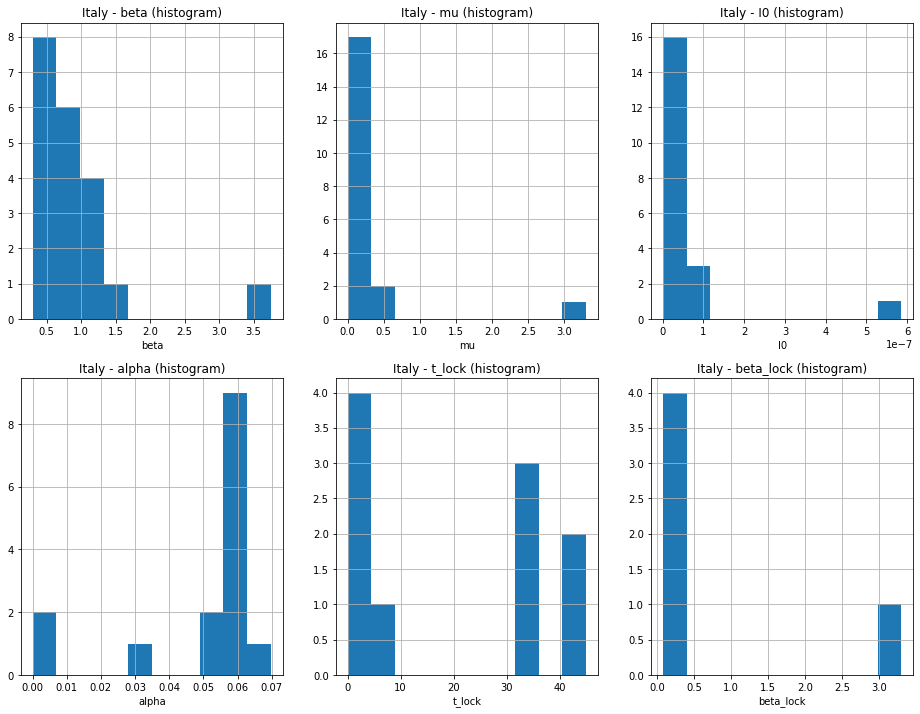

In [19]:
fig = plt.figure(figsize=(16,12))
for i, p in enumerate(params):
    plt.subplot(2,3,i+1)
    df[p].hist()
    plt.title(country + ' - '+p +' (histogram)')
    plt.xlabel(p)
plt.show()

# 5. Residuals vs. time (~days)

### F-residuals

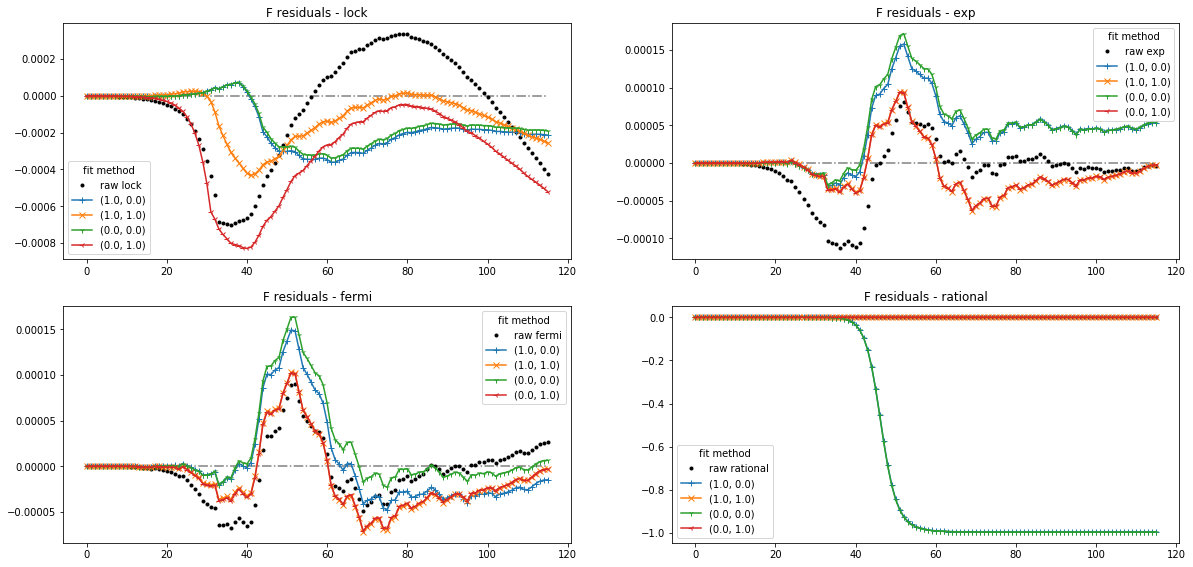

split without acc fit/with acc fit  for rational time


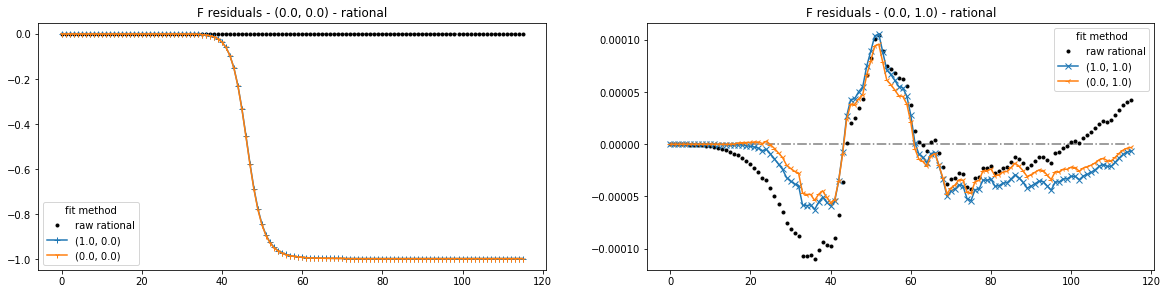

In [21]:
#F-residuals
markers = ['+','x','1','3','.']
figsize = plt.figure(figsize=(20,20))
for i,time in enumerate(times):
    plt.subplot(4,2,i+1)
    
    #raw fit
    mod=models[country][time]
    fname=time+'.csv'
    df = pd.read_csv('original_params/'+fname, index_col=0)
    opt_params=list(df.loc[country][:-2])
    #mean square residual
    y=(mod.data/mod.N-mod.predict(opt_params,out='F')) #RESIDUALS
    x=range(len(y))
    plt.plot(x,y,'.',color='black',label='raw '+time)       
    
    for j,weight in enumerate(weights):
        a_w, r_w = weight
        #get opt params
        mod=models[country][time]
        fname=time+'_'+str(a_w)+'_'+str(r_w)+'.csv'
        df = pd.read_csv('params/'+fname, index_col=0)
        opt_params=list(df.loc[country][:-2])

        #F residuals
        y=(mod.data/mod.N-mod.predict(opt_params,out='F')) #RESIDUALS
        #plot
        x=range(len(y))
        plt.plot(x,y,marker=markers[j],label=weight)
        
    plt.legend(title='fit method')
    plt.title('F residuals - '+time)
    plt.hlines(y=0,xmin=min(x),xmax=max(x),linestyles='-.',colors='grey')
plt.show()

#################################
print('split without acc fit/with acc fit  for rational time')
#################################

#redo F-plot for rational time dependence
time='rational'
fig = plt.figure(figsize=(20,10))

mod=models[country][time]
fname=time+'.csv'
df = pd.read_csv('original_params/'+fname, index_col=0)
opt_params=list(df.loc[country][:-2])
#mean square residual
y_raw=(mod.data/mod.N-mod.predict(opt_params,out='F')) #RESIDUALS
x_raw=range(len(y_raw))

for i in (0,1):
    plt.subplot(2,2,1+i)
    plt.plot(x_raw,y_raw,'.',color='black',label='raw '+time)
    for k in (0,2):
        j=i+k
        weight=weights[j]
        a_w, r_w = weight

        fname=time+'_'+str(a_w)+'_'+str(r_w)+'.csv'
        df = pd.read_csv('params/'+fname, index_col=0)
        opt_params=list(df.loc[country][:-2])

        #F residuals
        y=(mod.data/mod.N-mod.predict(opt_params,out='F')) #RESIDUALS
        #plot
        x=range(len(y))
        plt.plot(x,y,marker=markers[j],label=weight)
    plt.title('F residuals - ' + str(weight) +' - '+time)
    plt.legend(title='fit method')
    plt.hlines(y=0,xmin=min(x),xmax=max(x),linestyles='-.',colors='grey')
plt.show()

At time ~40, the raw data fit is less precise than in the beginning. <br>
Given that lock-time dep. can be treated as an exception, the raw fit works better for later times (50 - 100), except the increase in the end.<br>
The final increase (e.g. time=lock, raw fit) might be an indicator for overfitting?